 <center> <span center style="color:red"> <b> Sparks Fondation @GRIP July2022 </span> </center>
  <center> Name: <span style='background :yellow'> <b> Rania Fradi </span> </center>   <br>
        

 <center>  <b>Task1: Predict the percentage of a student based on the number of study hours:<center> <br>  

# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

<i> Reading the csv file  

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(9)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


In [3]:
rows, cols = df.shape
print("Number of Rows = ", rows)
print("Number of Columns = ", cols)

df.describe()

Number of Rows =  25
Number of Columns =  2


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<i> Plotting the data points

Text(0, 0.5, 'Score')

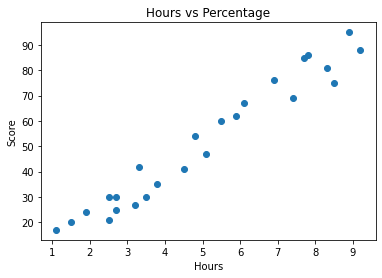

In [5]:
plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Score') 

<i> From the graph above, we can notice that there is a positive linear relation between the number of hours and the score: <b> Linear Regression

# Preparing Data

<i> Dividing the data into <b>attributes</b> and <b>labels

In [6]:
x = df.iloc[:, :-1].values #df[['Hours']]
y = df.iloc[:, 1].values  #df[['Scores']]

Splitting data into <b>training</b> and <b>test</b> sets

In [7]:
x_train, x_test,y_train , y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

# Training Algorithm

In [8]:
reg = LinearRegression()
reg.fit(x_train, y_train)

accuracy = reg.score(x_test, y_test)  
print(" Accuracy: \n", accuracy)
print("\n Coefficient: \n", reg.coef_)
print("\n Interception: \n", reg.intercept_)

 Accuracy: 
 0.9532037472447153

 Coefficient: 
 [9.47347241]

 Interception: 
 4.674740060627009


<i>Predict a student's score

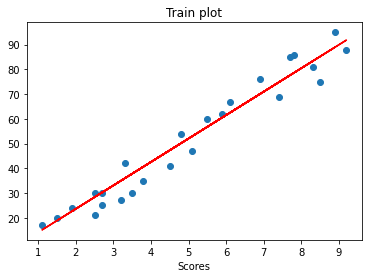

In [9]:
plt.scatter(x, y)
plt.xlabel('Hours')
plt.xlabel('Scores')
plt.title('Train plot')

line = reg.coef_*x+reg.intercept_
plt.plot(x,line , color='red')

# Predictions

In [10]:
predictions  = reg.predict(x_test)
predictions 

array([30.25311555, 37.83189348, 91.83068619, 28.35842107, 77.62047758])

In [11]:
x_test
a = []
for i in range(len(x_test)):
    a.append(x_test[i])
a

[array([2.7]), array([3.5]), array([9.2]), array([2.5]), array([7.7])]

In [12]:
predictions  = reg.predict(x_test)
predictions

array([30.25311555, 37.83189348, 91.83068619, 28.35842107, 77.62047758])

In [13]:
df1 = pd.DataFrame({'Hours of study': a[0][0], 'Actual score': y_test, 'Predicted score': predictions})  
df1

,Hours of study,Actual score,Predicted score
0,2.7,25,30.253116
1,2.7,30,37.831893
2,2.7,88,91.830686
3,2.7,21,28.358421
4,2.7,85,77.620478


<i> Predict a new data

In [14]:
hours = 10
pred = reg.predict([[hours]])
print(' For ', hours, 'hours, we predict ', format(pred[0], '.2f'), 'as a score')

 For  10 hours, we predict  99.41 as a score
